In [1]:
!pip install pybullet

     |████████████████████████████████| 102.0MB 51kB/s 


In [44]:
import pybullet_envs
import gym
import glob
import os
from base64 import b64encode
from IPython.display import HTML
gym.logger.set_level(40)

In [45]:
def wrap_monitor(env):
    return gym.wrappers.Monitor(env, './monitor', video_callable=lambda x: True, force=True)

def play_mp4():
    path = glob.glob(os.path.join('./monitor', '*.mp4'))[0]
    mp4 = open(path, 'rb').read()
    url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return HTML("""<video width=400 controls><source src="%s" type="video/mp4"></video>""" % url)

## gym.wrappersを使う方法

In [58]:
env = gym.make('InvertedPendulumBulletEnv-v0')
env = wrap_monitor(env)

print('observation space: ', env.observation_space)
print('action space: ', env.action_space)

env.reset()
done = False

# 終了シグナル(done=True)が返ってくるまで，ランダムに環境を動かす．
while (not done):
  action = env.action_space.sample()
  _, _, done, _ = env.step(action)

del env

play_mp4()

observation space:  Box(5,)
action space:  Box(1,)


## matplotlib animation

observation space:  Box(5,)
action space:  Box(1,)


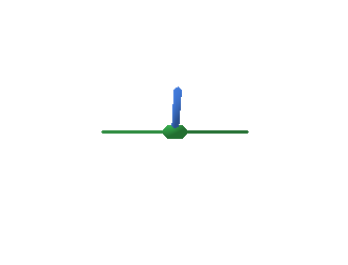

In [81]:
env = gym.make('InvertedPendulumBulletEnv-v0')
# env = wrap_monitor(env)

print('observation space: ', env.observation_space)
print('action space: ', env.action_space)

env.reset()
done = False

frames = []
frames.append(env.render(mode = 'rgb_array'))

# 終了シグナル(done=True)が返ってくるまで，ランダムに環境を動かす．
while (not done):
  action = env.action_space.sample()
  _, _, done, _ = env.step(action)
  frames.append(env.render(mode = 'rgb_array'))

del env

from matplotlib import pyplot as plt
import matplotlib.animation as animation

plt.figure(figsize=(frames[0].shape[1]/52.0, frames[0].shape[0]/52.0), dpi=72)
patch = plt.imshow(frames[0]);
plt.axis('off')
  
def animate(i):
    patch.set_data(frames[i])
    
anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=50)
HTML(anim.to_jshtml())